<a href="https://colab.research.google.com/github/GodingWal/DS-Unit-1-Build/blob/master/Unit_1_Build_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statistics
from scipy import stats
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving nba_team_stats_00_to_18.csv to nba_team_stats_00_to_18.csv


In [3]:
nba = pd.read_csv('nba_team_stats_00_to_18.csv')
nba.head()

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,0,Atlanta Hawks,82,29,53,0.354,48.4,113.3,41.4,91.8,45.1,13.0,37.0,35.2,17.6,23.4,75.2,11.6,34.5,46.1,25.8,17.0,8.2,5.1,5.5,23.6,22.2,-6.0,2018-19
1,1,Boston Celtics,82,49,33,0.598,48.2,112.4,42.1,90.5,46.5,12.6,34.5,36.5,15.6,19.5,80.2,9.8,34.7,44.5,26.3,12.8,8.6,5.3,3.9,20.4,19.5,4.4,2018-19
2,2,Brooklyn Nets,82,42,40,0.512,48.7,112.2,40.3,89.7,44.9,12.8,36.2,35.3,19.0,25.5,74.5,11.0,35.6,46.6,23.8,15.1,6.6,4.1,5.3,21.5,22.0,-0.1,2018-19
3,3,Charlotte Hornets,82,39,43,0.476,48.4,110.7,40.2,89.8,44.8,11.9,33.9,35.1,18.4,23.1,79.7,9.9,33.9,43.8,23.2,12.2,7.2,4.9,6.0,18.9,20.6,-1.1,2018-19
4,4,Chicago Bulls,82,22,60,0.268,48.5,104.9,39.8,87.9,45.3,9.1,25.9,35.1,16.2,20.7,78.3,8.8,34.1,42.9,21.9,14.1,7.4,4.3,5.8,20.3,18.7,-8.4,2018-19


In [0]:
df = nba.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,Atlanta Hawks,82,29,53,0.354,48.4,113.3,41.4,91.8,45.1,13.0,37.0,35.2,17.6,23.4,75.2,11.6,34.5,46.1,25.8,17.0,8.2,5.1,5.5,23.6,22.2,-6.0,2018-19
1,Boston Celtics,82,49,33,0.598,48.2,112.4,42.1,90.5,46.5,12.6,34.5,36.5,15.6,19.5,80.2,9.8,34.7,44.5,26.3,12.8,8.6,5.3,3.9,20.4,19.5,4.4,2018-19
2,Brooklyn Nets,82,42,40,0.512,48.7,112.2,40.3,89.7,44.9,12.8,36.2,35.3,19.0,25.5,74.5,11.0,35.6,46.6,23.8,15.1,6.6,4.1,5.3,21.5,22.0,-0.1,2018-19
3,Charlotte Hornets,82,39,43,0.476,48.4,110.7,40.2,89.8,44.8,11.9,33.9,35.1,18.4,23.1,79.7,9.9,33.9,43.8,23.2,12.2,7.2,4.9,6.0,18.9,20.6,-1.1,2018-19
4,Chicago Bulls,82,22,60,0.268,48.5,104.9,39.8,87.9,45.3,9.1,25.9,35.1,16.2,20.7,78.3,8.8,34.1,42.9,21.9,14.1,7.4,4.3,5.8,20.3,18.7,-8.4,2018-19


In [6]:
df.isnull().sum()

TEAM      0
GP        0
W         0
L         0
WIN%      0
MIN       0
PTS       0
FGM       0
FGA       0
FG%       0
3PM       0
3PA       0
3P%       0
FTM       0
FTA       0
FT%       0
OREB      0
DREB      0
REB       0
AST       0
TOV       0
STL       0
BLK       0
BLKA      0
PF        0
PFD       0
+/-       0
SEASON    0
dtype: int64

In [0]:
#df = df.set_index('SEASON')

In [8]:
df.head(35)

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,Atlanta Hawks,82,29,53,0.354,48.4,113.3,41.4,91.8,45.1,13.0,37.0,35.2,17.6,23.4,75.2,11.6,34.5,46.1,25.8,17.0,8.2,5.1,5.5,23.6,22.2,-6.0,2018-19
1,Boston Celtics,82,49,33,0.598,48.2,112.4,42.1,90.5,46.5,12.6,34.5,36.5,15.6,19.5,80.2,9.8,34.7,44.5,26.3,12.8,8.6,5.3,3.9,20.4,19.5,4.4,2018-19
2,Brooklyn Nets,82,42,40,0.512,48.7,112.2,40.3,89.7,44.9,12.8,36.2,35.3,19.0,25.5,74.5,11.0,35.6,46.6,23.8,15.1,6.6,4.1,5.3,21.5,22.0,-0.1,2018-19
3,Charlotte Hornets,82,39,43,0.476,48.4,110.7,40.2,89.8,44.8,11.9,33.9,35.1,18.4,23.1,79.7,9.9,33.9,43.8,23.2,12.2,7.2,4.9,6.0,18.9,20.6,-1.1,2018-19
4,Chicago Bulls,82,22,60,0.268,48.5,104.9,39.8,87.9,45.3,9.1,25.9,35.1,16.2,20.7,78.3,8.8,34.1,42.9,21.9,14.1,7.4,4.3,5.8,20.3,18.7,-8.4,2018-19
5,Cleveland Cavaliers,82,19,63,0.232,48.2,104.5,38.9,87.6,44.4,10.3,29.1,35.5,16.4,20.7,79.2,10.7,31.9,42.7,20.7,13.5,6.5,2.4,5.6,20.0,19.4,-9.6,2018-19
6,Dallas Mavericks,82,33,49,0.402,48.2,108.9,38.8,86.9,44.7,12.5,36.6,34.0,18.8,25.3,74.2,10.1,35.2,45.3,23.4,14.2,6.5,4.3,4.5,20.1,23.2,-1.3,2018-19
7,Denver Nuggets,82,54,28,0.659,48.1,110.7,41.9,90.0,46.6,11.0,31.4,35.1,15.8,20.9,75.5,11.9,34.5,46.4,27.4,13.4,7.7,4.4,5.0,20.0,20.4,4.0,2018-19
8,Detroit Pistons,82,41,41,0.500,48.4,107.0,38.8,88.3,44.0,12.1,34.8,34.8,17.3,23.1,74.7,11.4,33.6,45.0,22.5,13.8,6.9,4.0,5.1,22.1,21.3,-0.2,2018-19
9,Golden State Warriors,82,57,25,0.695,48.3,117.7,44.0,89.8,49.1,13.3,34.4,38.5,16.3,20.4,80.1,9.7,36.5,46.2,29.4,14.3,7.6,6.4,3.6,21.4,19.5,6.5,2018-19


In [35]:
nba_00_01 = df[(df['SEASON']=='2000-01')]
print(statistics.mean(nba_00_01['3PA']))
print(statistics.mean(nba_00_01['3P%']))
print(statistics.mean(nba_00_01['FGA']))
statistics.mean(nba_00_01['PTS'])

13.706896551724139
35.182758620689654
80.60344827586206


94.8103448275862

In [36]:
nba_01_02 = df[(df['SEASON']=='2001-02')]
print(statistics.mean(nba_01_02['3PA']))
print(statistics.mean(nba_01_02['3P%']))
print(statistics.mean(nba_01_02['FGA']))
statistics.mean(nba_01_02['PTS'])

14.755172413793103
35.175862068965515
81.26551724137931


95.47241379310344

In [37]:
nba_02_03 = df[(df['SEASON']=='2002-03')]
print(statistics.mean(nba_02_03['3PA']))
print(statistics.mean(nba_02_03['3P%']))
print(statistics.mean(nba_02_03['FGA']))
statistics.mean(nba_02_03['PTS'])

14.675862068965518
34.66206896551724
80.78275862068965


95.0896551724138

In [38]:
nba_03_04 = df[(df['SEASON']=='2003-04')]
print(statistics.mean(nba_03_04['3PA']))
print(statistics.mean(nba_03_04['3P%']))
print(statistics.mean(nba_03_04['FGA']))
statistics.mean(nba_03_04['PTS'])

14.920689655172414
34.5551724137931
79.81724137931035


93.39655172413794

In [39]:
nba_04_05 = df[(df['SEASON']=='2004-05')]
print(statistics.mean(nba_04_05['3PA']))
print(statistics.mean(nba_04_05['3P%']))
print(statistics.mean(nba_04_05['FGA']))
statistics.mean(nba_04_05['PTS'])

15.75
35.31666666666667
80.33666666666667


97.19

In [40]:
nba_05_06 = df[(df['SEASON']=='2005-06')]
print(statistics.mean(nba_05_06['3PA']))
print(statistics.mean(nba_05_06['3P%']))
print(statistics.mean(nba_05_06['FGA']))
statistics.mean(nba_05_06['PTS'])

15.983333333333334
35.68666666666667
78.99


97.01333333333334

In [41]:
nba_06_07 = df[(df['SEASON']=='2006-07')]
print(statistics.mean(nba_06_07['3PA']))
print(statistics.mean(nba_06_07['3P%']))
print(statistics.mean(nba_06_07['FGA']))
statistics.mean(nba_06_07['PTS'])

16.94
35.68
79.71


98.74

In [42]:
nba_07_08 = df[(df['SEASON']=='2007-08')]
print(statistics.mean(nba_07_08['3PA']))
print(statistics.mean(nba_07_08['3P%']))
print(statistics.mean(nba_07_08['FGA']))
statistics.mean(nba_07_08['PTS'])

18.106666666666666
36.02333333333333
81.51


99.92333333333333

In [43]:
nba_08_09 = df[(df['SEASON']=='2008-09')]
print(statistics.mean(nba_08_09['3PA']))
print(statistics.mean(nba_08_09['3P%']))
print(statistics.mean(nba_08_09['FGA']))
statistics.mean(nba_08_09['PTS'])

18.133333333333333
36.54333333333334
80.91666666666667


99.94333333333333

In [44]:
nba_09_10 = df[(df['SEASON']=='2009-10')]
print(statistics.mean(nba_09_10['3PA']))
print(statistics.mean(nba_09_10['3P%']))
print(statistics.mean(nba_09_10['FGA']))
statistics.mean(nba_09_10['PTS'])

18.136666666666667
35.276666666666664
81.69333333333333


100.45

In [45]:
nba_10_11 = df[(df['SEASON']=='2010-11')]
print(statistics.mean(nba_10_11['3PA']))
print(statistics.mean(nba_10_11['3P%']))
print(statistics.mean(nba_10_11['FGA']))
statistics.mean(nba_10_11['PTS'])

18.01
35.626666666666665
81.21


99.55333333333333

In [46]:
nba_11_12 = df[(df['SEASON']=='2011-12')]
print(statistics.mean(nba_11_12['3PA']))
print(statistics.mean(nba_11_12['3P%']))
print(statistics.mean(nba_11_12['FGA']))
statistics.mean(nba_11_12['PTS'])

18.386666666666667
34.723333333333336
81.42999999999999


96.26

In [47]:
nba_12_13 = df[(df['SEASON']=='2012-13')]
print(statistics.mean(nba_12_13['3PA']))
print(statistics.mean(nba_12_13['3P%']))
print(statistics.mean(nba_12_13['FGA']))
statistics.mean(nba_12_13['PTS'])

19.966666666666665
35.75666666666667
82.02666666666667


98.13666666666667

In [48]:
nba_13_14 = df[(df['SEASON']=='2013-14')]
print(statistics.mean(nba_13_14['3PA']))
print(statistics.mean(nba_13_14['3P%']))
print(statistics.mean(nba_13_14['FGA']))
statistics.mean(nba_13_14['PTS'])

21.536666666666665
35.876666666666665
83.0


101.01

In [49]:
nba_14_15 = df[(df['SEASON']=='2014-15')]
print(statistics.mean(nba_14_15['3PA']))
print(statistics.mean(nba_14_15['3P%']))
print(statistics.mean(nba_14_15['FGA']))
statistics.mean(nba_14_15['PTS'])

22.41
34.910000000000004
83.56333333333333


100.01666666666667

In [50]:
nba_15_16 = df[(df['SEASON']=='2015-16')]
print(statistics.mean(nba_15_16['3PA']))
print(statistics.mean(nba_15_16['3P%']))
print(statistics.mean(nba_15_16['FGA']))
statistics.mean(nba_15_16['PTS'])

24.083333333333332
35.276666666666664
84.57000000000001


102.66333333333333

In [51]:
nba_16_17 = df[(df['SEASON']=='2016-17')]
print(statistics.mean(nba_16_17['3PA']))
print(statistics.mean(nba_16_17['3P%']))
print(statistics.mean(nba_16_17['FGA']))
statistics.mean(nba_16_17['PTS'])

27.003333333333334
35.71666666666667
85.41666666666667


105.59

In [52]:
nba_17_18 = df[(df['SEASON']=='2017-18')]
print(statistics.mean(nba_17_18['3PA']))
print(statistics.mean(nba_17_18['3P%']))
print(statistics.mean(nba_17_18['FGA']))
statistics.mean(nba_17_18['PTS'])

28.996666666666666
36.17333333333333
86.06333333333333


106.33666666666667

In [53]:
nba_18_19 = df[(df['SEASON']=='2018-19')]
print(statistics.mean(nba_18_19['3PA']))
print(statistics.mean(nba_18_19['3P%']))
print(statistics.mean(nba_18_19['FGA']))
statistics.mean(nba_18_19['PTS'])

32.00666666666667
35.55
89.21333333333334


111.20333333333333

In [0]:
nba_3PA_mean =  np.array([13.7, 14.7, 14.7, 14.9, 15.7, 16, 17, 18.1, 
18.1, 18, 18.4, 20, 21.5, 22.4, 24.1, 27, 29, 32])

In [0]:
nba_3PM_mean = np.array([4.8, 5.2, 5.1, 5.2, 5.6, 6.1, 6.6, 6.6, 6.4,
6.5, 6.4, 7.2, 7.7, 8.5, 9.6, 10.5, 11.4])

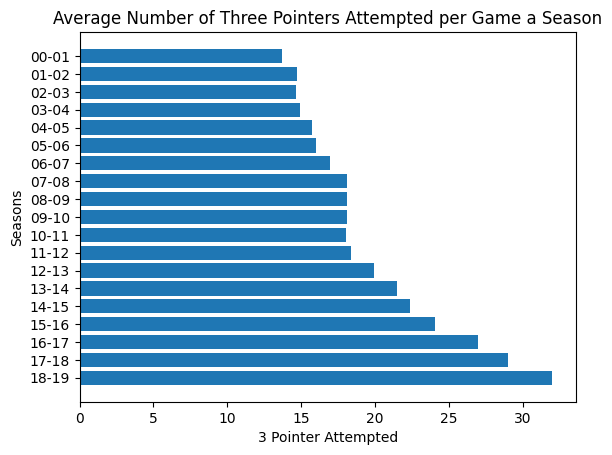

In [30]:
plt.rcdefaults()
fig, ax = plt.subplots()

NBA_Season = ('00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07',
              '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14',
              '14-15', '15-16', '16-17', '17-18', '18-19')
y_pos = np.arange(len(NBA_Season))
performance = [13.70,14.75,14.67,14.92,15.75,15.98,16.94,18.10,
18.13,18.13,18.01,18.38,19.96,21.53,22.41,24.08,27,28.99,32]


ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(NBA_Season)
ax.invert_yaxis() 
ax.set_ylabel('Seasons')
ax.set_xlabel('3 Pointer Attempted')
ax.set_title('Average Number of Three Pointers Attempted per Game a Season')

plt.show()

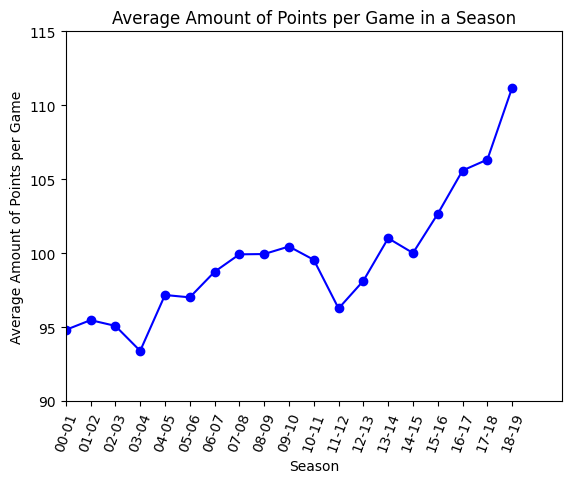

In [31]:
names = ['00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07',
              '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14',
              '14-15', '15-16', '16-17', '17-18', '18-19']

values = [94.81,95.47,95.08,93.39,97.17,97.01,98.74,99.92,99.94,100.45,
               99.55,96.26,98.13,101.01,100.01,102.66,105.59,106.33,111.20]
plt.plot(names,values, 'bo-', label='2X')
degrees = 70
plt.xticks(rotation=degrees)
plt.axis([0,20,90,115])
plt.ylabel('Average Amount of Points per Game')
plt.xlabel('Season')
plt.title('Average Amount of Points per Game in a Season')

plt.show()

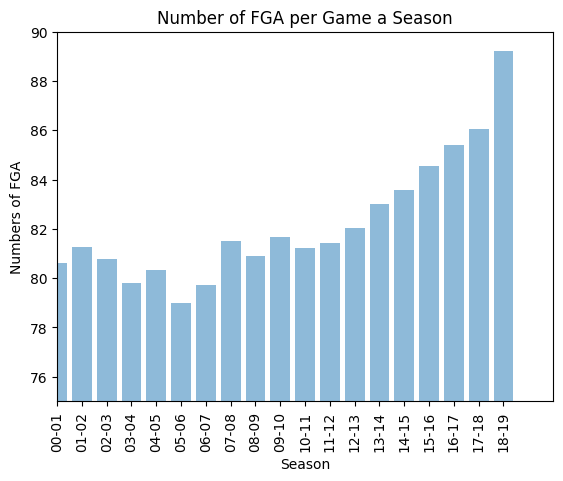

In [32]:
names = ['00-01', '01-02', '02-03', '03-04', '04-05', '05-06', '06-07',
              '07-08', '08-09', '09-10', '10-11', '11-12', '12-13', '13-14',
              '14-15', '15-16', '16-17', '17-18', '18-19']

y_pos = np.arange(len(names))
values = [80.60,81.26,80.78,79.81,80.33,78.99,79.71,81.51,80.91,
          81.69,81.21,81.42,82.02,83.0,83.56,84.57,85.41,86.06,89.21]

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('Numbers of FGA')
plt.xlabel('Season')
degrees = 90
plt.xticks(rotation=degrees)
plt.axis([0,20,75,90])
plt.title('Number of FGA per Game a Season')

plt.show()